In [45]:
cd /home/dongdong/tigress/4.1/msm/temp_macro/

/tigress/dongdong/4.1/msm/temp_macro


In [25]:
import mdtraj as md
import numpy as np

In [5]:
t=md.load_xtc('0_sample.xtc',top='begin.pdb',stride=2)

In [19]:
aa=md.compute_dssp(t)

In [23]:
aa.shape[1]

67

In [26]:
np.zeros(67)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [37]:
Hp=np.zeros(67)
Ep=np.zeros(67)
Cp=np.zeros(67)
population=np.loadtxt('../Macro_Population.dat')
for tt in range(200):
    t=md.load_xtc('%d_sample.xtc' %tt,top='begin.pdb',stride=2)
    ss=md.compute_dssp(t)
    for i in range(ss.shape[1]):
        Hp[i]+=list(ss[:,i]).count('H')/ss.shape[0]*population[tt]
        Ep[i]+=list(ss[:,i]).count('E')/ss.shape[0]*population[tt]
        Cp[i]+=list(ss[:,i]).count('C')/ss.shape[0]*population[tt]
    

In [31]:
np.arange(1,68)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])

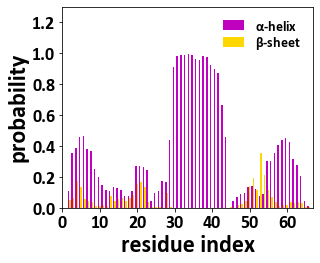

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=14)

resid=np.arange(1,68)
width=0.4
fig, ax = plt.subplots(figsize=(4.5,3.7))
bar_h = ax.bar(resid-width,Hp,width, color='m',label=r'$\mathregular{\alpha}$-helix')
bar_s = ax.bar(resid,Ep,width, color='gold',label=r'$\mathregular{\beta}$-sheet')
#bar_c = ax.bar(resid+width,Cp,width, color='silver',label='coil')
ax.set_ylabel('probability',fontproperties=font_prop)
ax.set_xlabel('residue index',fontproperties=font_prop)
plt.ylim(0,1.3)
plt.xlim(0,67)
leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(18)
plt.savefig('ssdump.png',dpi=600,bbox_inches='tight')

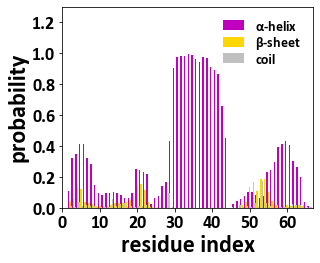

In [46]:
Hp=np.zeros(67)
Ep=np.zeros(67)
Bp=np.zeros(67)
population=np.loadtxt('../Macro_Population.dat')
for tt in range(200):
    t=md.load_xtc('%d_sample.xtc' %tt,top='begin.pdb',stride=2)
    ss=md.compute_dssp(t,simplified=False)
    for i in range(ss.shape[1]):
        Hp[i]+=list(ss[:,i]).count('H')/ss.shape[0]*population[tt]
        Ep[i]+=list(ss[:,i]).count('E')/ss.shape[0]*population[tt]
        Bp[i]+=list(ss[:,i]).count('B')/ss.shape[0]*population[tt]
resid=np.arange(1,68)
width=0.4
fig, ax = plt.subplots(figsize=(4.5,3.7))
bar_h = ax.bar(resid-width,Hp,width, color='m',label=r'$\mathregular{\alpha}$-helix')
bar_s = ax.bar(resid,Ep,width, color='gold',label=r'$\mathregular{\beta}$-sheet')
bar_c = ax.bar(resid+width,Bp,width, color='silver',label='coil')
ax.set_ylabel('probability',fontproperties=font_prop)
ax.set_xlabel('residue index',fontproperties=font_prop)
plt.ylim(0,1.3)
plt.xlim(0,67)
leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(18)
plt.savefig('ssdump.png',dpi=600,bbox_inches='tight')

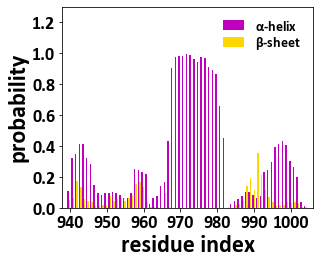

In [50]:
fig, ax = plt.subplots(figsize=(4.5,3.7))
resid=np.arange(1+938,68+938)
bar_h = ax.bar(resid-width,Hp,width, color='m',label=r'$\mathregular{\alpha}$-helix')
bar_s = ax.bar(resid,Ep+Bp,width, color='gold',label=r'$\mathregular{\beta}$-sheet')
#bar_c = ax.bar(resid+width,Bp,width, color='silver',label='coil')
ax.set_ylabel('probability',fontproperties=font_prop)
ax.set_xlabel('residue index',fontproperties=font_prop)
plt.ylim(0,1.3)
plt.xlim(938,1006)
leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(18)
plt.savefig('ssdump.png',dpi=600,bbox_inches='tight')

In [41]:
cd /home/dongdong/tigress/4.1/msm/temp_micro/

/tigress/dongdong/4.1/msm/pdb


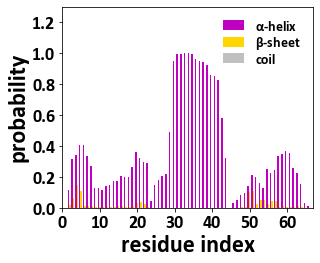

In [43]:
Hp=np.zeros(67)
Ep=np.zeros(67)
Cp=np.zeros(67)
population=np.loadtxt('Populations.dat')
for tt in range(1199):
    t=md.load_xtc('micro%d/traj.xtc' %tt,top='begin.pdb',stride=1)
    ss=md.compute_dssp(t,simplified=False)
    for i in range(ss.shape[1]):
        Hp[i]+=list(ss[:,i]).count('H')/ss.shape[0]*population[tt]
        Ep[i]+=list(ss[:,i]).count('E')/ss.shape[0]*population[tt]
        Cp[i]+=list(ss[:,i]).count('')/ss.shape[0]*population[tt]
resid=np.arange(1,68)
width=0.4
fig, ax = plt.subplots(figsize=(4.5,3.7))
bar_h = ax.bar(resid-width,Hp,width, color='m',label=r'$\mathregular{\alpha}$-helix')
bar_s = ax.bar(resid,Ep,width, color='gold',label=r'$\mathregular{\beta}$-sheet')
bar_c = ax.bar(resid+width,Cp,width, color='silver',label='coil')
ax.set_ylabel('probability',fontproperties=font_prop)
ax.set_xlabel('residue index',fontproperties=font_prop)
plt.ylim(0,1.3)
plt.xlim(0,67)
leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(18)
plt.savefig('ssdump.png',dpi=600,bbox_inches='tight')